# Test Claude Code

In [21]:
import logging

from dotenv import load_dotenv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns


# Force autoreload
%load_ext autoreload
%autoreload 2

# Logger
logger = logging.getLogger()
logging.basicConfig(
    format='%(asctime)s %(levelname)s: %(message)s',
    level=logging.INFO,
    datefmt='%I:%M:%S'
)

# Load dotenv
_ = load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from gp_sand.gp_benchmark import generate_homoscedastic_data


x, y, y_true = generate_homoscedastic_data()

<Axes: ylabel='Density'>

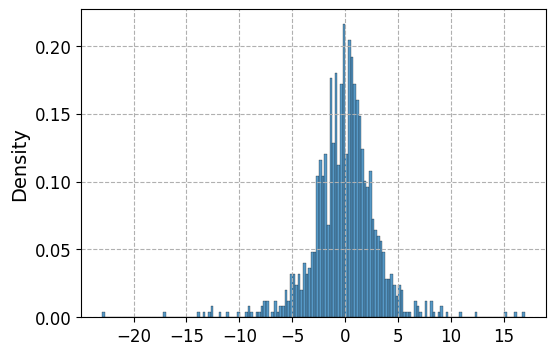

In [23]:
_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

sns.histplot(
    x=x,
    binwidth=0.25,
    pthresh=0.01,
    stat='density'
)

<Axes: >

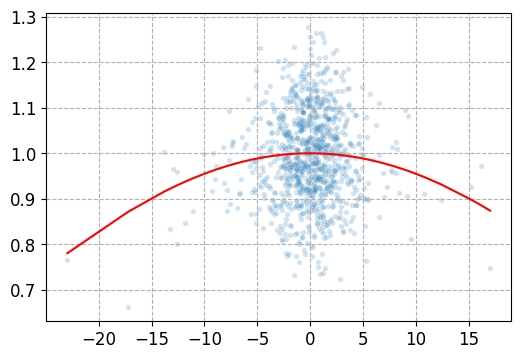

In [24]:
_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

sns.lineplot(
    x=x,
    y=y_true,
    zorder=10,
    color='r'
)

sns.scatterplot(
    x=x,
    y=y,
    s=15,
    alpha=.2,
)

In [33]:
from sklearn.model_selection import train_test_split

from gp_sand.gp_benchmark import benchmark_gpytorch


x_train, x_test, y_train, y_test = train_test_split(x, y) 

res = benchmark_gpytorch(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
)


GPyTorch Benchmark
Iteration 100/500, Loss: 0.5331
Iteration 200/500, Loss: 0.0497
Iteration 300/500, Loss: -0.4042
Iteration 400/500, Loss: -0.7158
Iteration 500/500, Loss: -0.8343

Training time: 2.93s
Prediction time: 0.0025s


In [27]:
splits = train_test_split(*[x, y])

In [30]:
len(splits)

4